# Investigate a Dataset

I use "Salaries.csv" and 'AwardsSharePlayers.csv' to check "What factors have an effect on player salaries?" 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import Salaries data
Salary_Data = pd.read_csv('/Users/seven/Downloads/baseballdatabank-2017.1/core/Salaries.csv')

Let's check the basic information for this dataset.

In [2]:
Salary_Data.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [3]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [4]:
Salary_Data.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


Next step we will check the missing value and handle it.

In [5]:
# check the null value in the data
pd.isnull(Salary_Data).sum()

yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64

From these information, we can see there are 5 columns in this data set: yearID,teamID,lgID,playerID and salary. And there are 26428 data. There is no null data. We notice the minimum value in salary is 0. It seems weird. Let's check these data.  

In [6]:
#find the players with 0 salary
Salary_Data[Salary_Data['salary']==0]

,yearID,teamID,lgID,playerID,salary
6179,1993,NYA,AL,jamesdi01,0
12007,1999,PIT,NL,martija02,0


There are two players. Let's check them.

In [7]:
Salary_Data[Salary_Data['playerID']=='jamesdi01']

,yearID,teamID,lgID,playerID,salary
1302,1987,ATL,NL,jamesdi01,120000
1929,1988,ATL,NL,jamesdi01,360000
2591,1989,ATL,NL,jamesdi01,400000
3536,1990,CLE,AL,jamesdi01,650000
5293,1992,NYA,AL,jamesdi01,387500
6179,1993,NYA,AL,jamesdi01,0
8019,1995,NYA,AL,jamesdi01,350000


In [8]:
Salary_Data[Salary_Data['playerID']=='martija02']

,yearID,teamID,lgID,playerID,salary
11011,1998,PIT,NL,martija02,170000
12007,1999,PIT,NL,martija02,0


For 'jamesdi01', I will use the average of 1992 salary and 1995 salary as its value.
For 'martija02', I will use 1998 salary as its value.

In [9]:
Salary_Data["salary"].iloc[6179] = (387500 + 350000) / 2
Salary_Data["salary"].iloc[12007] = 170000

/Users/seven/anaconda/envs/py3k/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Now we will study the salary. First,let's see the frequency.

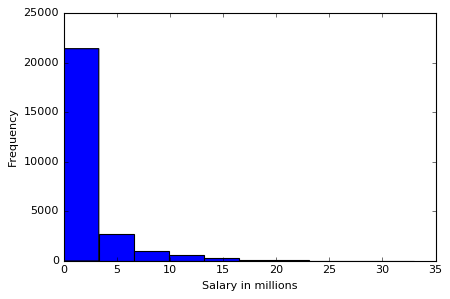

In [10]:
# plot the salary frequency
plt.hist(Salary_Data["salary"]/1000000, bins = 10)
plt.ylabel("Frequency")
plt.xlabel("Salary in millions")
plt.show()

In histogram, you can see that the most of the salaries are below 5 millions and very little number of people are more than 5 millions range. Now we will study how the salary changes with the year changes.

In [11]:
# find the average salary for each year
Salary_Data.groupby(['yearID']).mean()

,salary
yearID,
1985,4.762994e+05
1986,4.171470e+05
1987,4.347295e+05
1988,4.531711e+05
1989,5.063231e+05
1990,5.119737e+05
1991,8.949612e+05
1992,1.047521e+06
1993,9.773661e+05


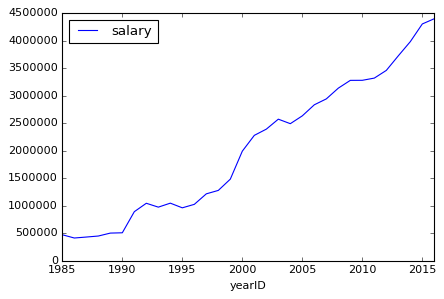

In [12]:
# plot the average salary for each year
Salary_Data.groupby(['yearID']).mean().plot()

From the data and figure, we can see basically the averge salary increase with time. Some years are different like 1986 or 2004. And the increasing speed became very fast from 1998 to 2003. 

Next we will study the team. Let's see how many teams here.

In [13]:
# find the team numbers
teamID=Salary_Data['teamID'].unique()
len(teamID)

46

There are 46 teams here. We make a pivot table for the average salary of each team for each year.

In [14]:
# make a pivot table about team and year salary
Grouped_Salary=Salary_Data.pivot_table(index='yearID', columns='teamID', values='salary', aggfunc='mean')
Grouped_Salary

teamID,ANA,ARI,ATL,BAL,BOS,CAL,CHA,CHC,CHN,CHW,...,SFG,SFN,SLN,STL,TBA,TBR,TEX,TOR,WAS,WSN
yearID,,,,,,,,,,,,,,,,,,,,,
1985,NaN,NaN,6.730455e+05,5.254869e+05,4.359024e+05,5.152819e+05,4.688656e+05,NaN,5.774053e+05,NaN,...,NaN,4.110857e+05,4.726833e+05,NaN,NaN,NaN,3.838250e+05,4.406275e+05,NaN,NaN
1986,NaN,NaN,5.897512e+05,4.483192e+05,4.966289e+05,4.974917e+05,3.360909e+05,NaN,5.551021e+05,NaN,...,NaN,3.195357e+05,3.657411e+05,NaN,NaN,NaN,2.593507e+05,4.670758e+05,NaN,NaN
1987,NaN,NaN,5.170175e+05,4.633424e+05,6.762778e+05,4.756851e+05,4.434101e+05,NaN,5.503077e+05,NaN,...,NaN,3.169565e+05,3.792903e+05,NaN,NaN,NaN,2.200000e+05,4.556305e+05,NaN,NaN
1988,NaN,NaN,4.389026e+05,5.011880e+05,5.790038e+05,4.266924e+05,2.662500e+05,NaN,5.247679e+05,NaN,...,NaN,4.952000e+05,4.770370e+05,NaN,NaN,NaN,2.428241e+05,4.708163e+05,NaN,NaN
1989,NaN,NaN,3.704111e+05,3.182757e+05,6.723749e+05,5.806859e+05,2.906164e+05,NaN,4.445000e+05,NaN,...,NaN,5.343869e+05,5.742440e+05,NaN,NaN,NaN,3.964594e+05,5.807738e+05,NaN,NaN
1990,NaN,NaN,4.548594e+05,2.616239e+05,6.424479e+05,6.205714e+05,3.061774e+05,NaN,4.394839e+05,NaN,...,NaN,5.686863e+05,5.863810e+05,NaN,NaN,NaN,4.020101e+05,6.576605e+05,NaN,NaN
1991,NaN,NaN,7.361400e+05,5.651290e+05,1.172250e+06,1.066452e+06,6.042738e+05,NaN,9.270267e+05,NaN,...,NaN,1.191064e+06,7.537931e+05,NaN,NaN,NaN,8.678333e+05,7.960967e+05,NaN,NaN
1992,NaN,NaN,1.116946e+06,7.206263e+05,1.406793e+06,1.158311e+06,1.005361e+06,NaN,1.065346e+06,NaN,...,NaN,1.326527e+06,9.511668e+05,NaN,NaN,NaN,9.718764e+05,1.244130e+06,NaN,NaN
1993,NaN,NaN,1.261861e+06,9.092656e+05,1.197438e+06,8.933854e+05,1.280521e+06,NaN,1.230833e+06,NaN,...,NaN,1.130645e+06,7.789111e+05,NaN,NaN,NaN,9.572884e+05,1.432702e+06,NaN,NaN


Let's plot some figures. Because there are 46 teams, the figures will be messy, but we can find some special teams. 

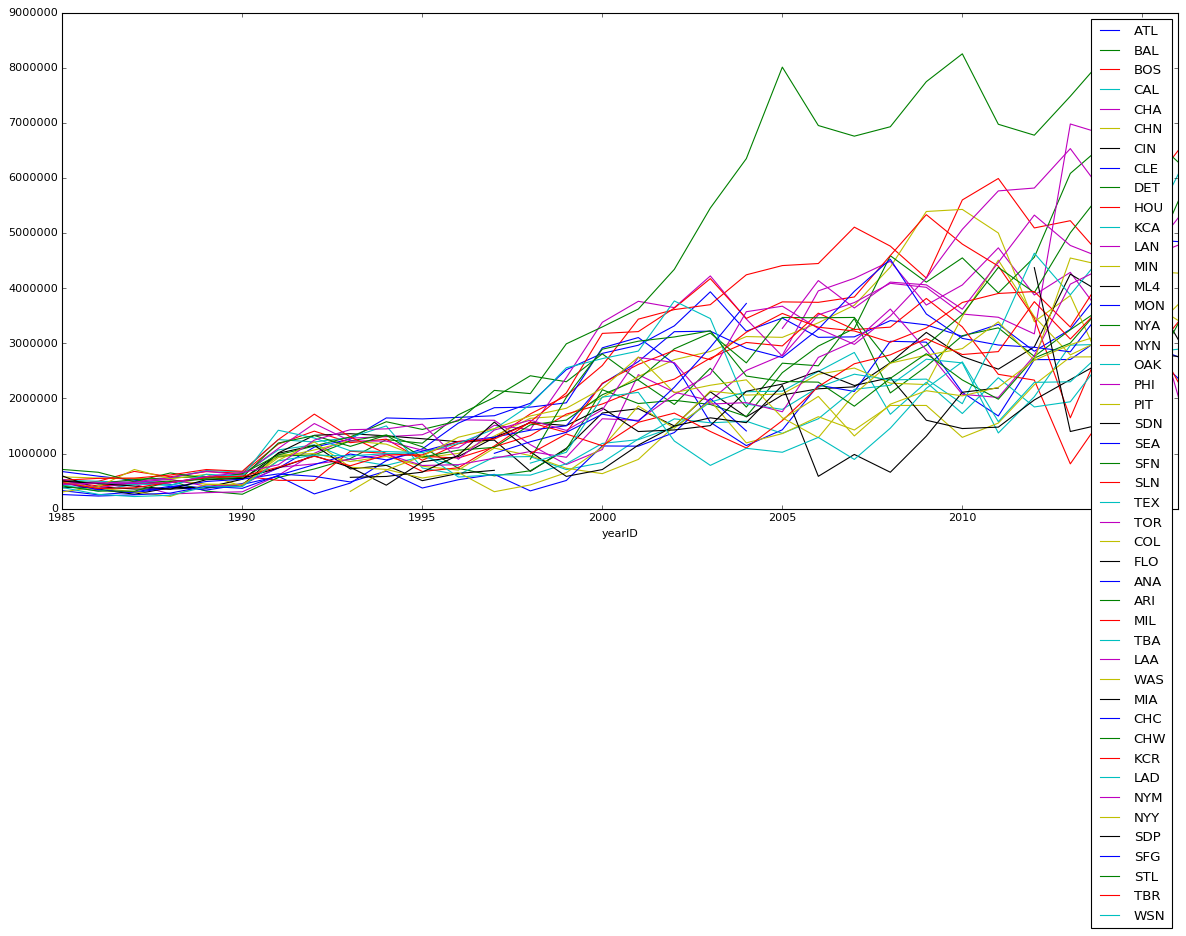

In [15]:
# plot team average salary change with the year
plt.figure(figsize = (18, 8))
for team in teamID:
    data = Grouped_Salary[team]
    data.plot()
    plt.legend()

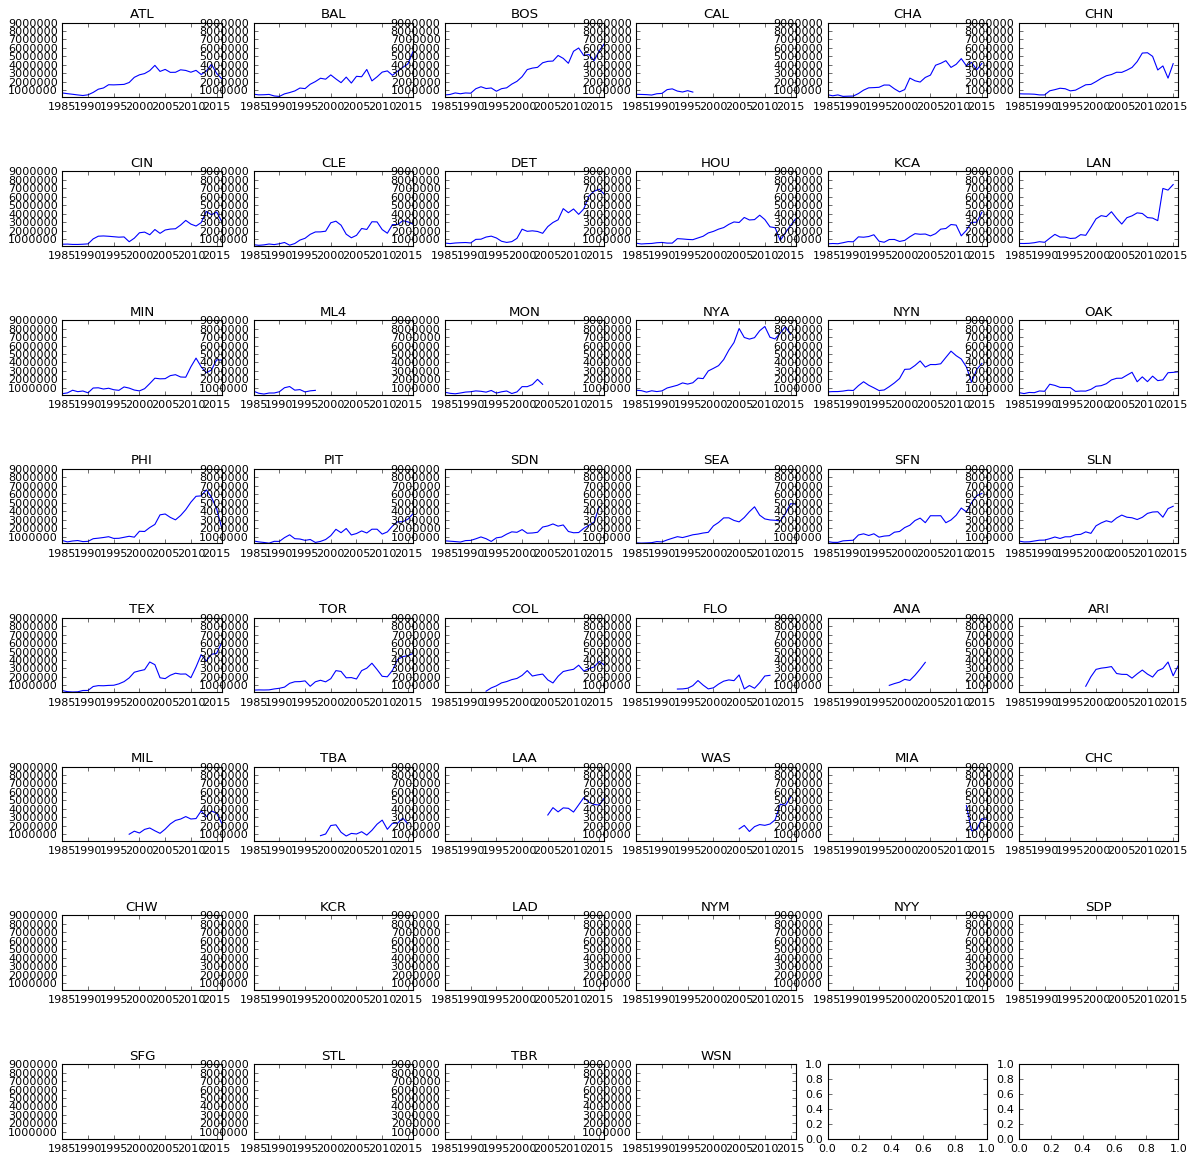

In [16]:
# plot for each team
fig, axs = plt.subplots(figsize=(18,18), 
                        nrows=8, ncols=6,     # fix as above
                        gridspec_kw=dict(hspace=1)) # Much control of gridspec

targets = zip(teamID, axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.plot(Grouped_Salary[key])
    ax.set_xlim(1985, 2016)
    ax.set_ylim(2e+05, 9e+06)
    ax.set_title('%s'%key)
plt.show()

We can see NYA has the highest average salary. NYA,BOS,CHN,PHI change very fast. KCA,OAK,CIN change very slowly. If we want detail, we can plot just for that one team.

Now I will find max, min, mean of salaries by team.

In [17]:
# Database with two columns: teamID and salary
salariesDF_reduced = Salary_Data[["teamID","salary"]]

#find the max min mean value for each team
salariesDF_summary_by_teamID = salariesDF_reduced.groupby("teamID").agg([np.max,np.min,np.mean])
salariesDF_summary_by_teamID.columns = ["max", "min", "mean"]
salariesDF_summary_by_teamID.head()

,max,min,mean
teamID,,,
ANA,13166667.0,150000.0,1.895109e+06
ARI,31799030.0,170000.0,2.521796e+06
ATL,16061802.0,60000.0,2.211176e+06
BAL,21268890.0,60000.0,2.028839e+06
BOS,30000000.0,60000.0,2.968591e+06


In [18]:
#find the top 10 team with max min mean salary and plot the bar 
def bargraph(column): 
    frequency = salariesDF_summary_by_teamID[column].sort_values(axis=0, ascending = False).head(10)
    objects = frequency.index
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, frequency, align='center')
    plt.xticks(y_pos, objects)
    plt.ylabel('Salary')
    plt.title("Top 10 {} of salaries by teamID".format(column))
    print("Top 10 {} of salaries by teamID".format(column))
    print(frequency)
    plt.show()

Top 10 max of salaries by teamID
teamID
LAD    33000000.0
NYA    33000000.0
LAN    32571000.0
ARI    31799030.0
BOS    30000000.0
DET    28000000.0
NYM    27328046.0
LAA    26187500.0
SEA    25857143.0
NYY    25000000.0
Name: max, dtype: float64


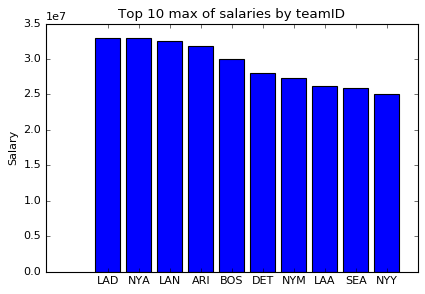

In [19]:
bargraph("max")

Top 10 min of salaries by teamID
teamID
WSN    514400.0
CHW    513000.0
NYM    511360.0
TBR    510000.0
CHC    508500.0
SFG    508500.0
KCR    508450.0
NYY    507500.0
STL    507500.0
LAD    507500.0
Name: min, dtype: float64


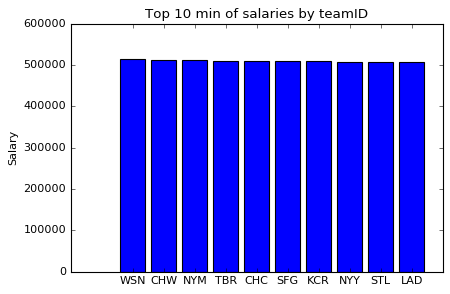

In [20]:
bargraph("min")

Top 10 mean of salaries by teamID
teamID
NYY    7.689579e+06
SFG    6.890151e+06
LAD    6.322525e+06
WSN    5.448179e+06
CHC    5.312678e+06
NYM    4.958857e+06
STL    4.614629e+06
KCR    4.534039e+06
CHW    4.519947e+06
LAA    4.291454e+06
Name: mean, dtype: float64


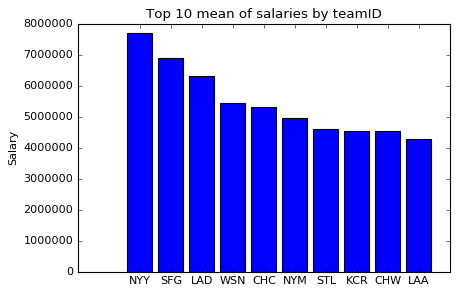

In [21]:
bargraph("mean")

## (2d) explorations
I believe that the player' pointsWon affects salaries. So I use "AwardsSharePlayers.csv" for next step.

In [22]:
# import Awards data
Awards_Data = pd.read_csv('/Users/seven/Downloads/baseballdatabank-2017.1/core/AwardsSharePlayers.csv')
Awards_Data.head()

,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
0,Cy Young,1956,ML,fordwh01,1.0,16,1.0
1,Cy Young,1956,ML,maglisa01,4.0,16,4.0
2,Cy Young,1956,ML,newcodo01,10.0,16,10.0
3,Cy Young,1956,ML,spahnwa01,1.0,16,1.0
4,Cy Young,1957,ML,donovdi01,1.0,16,1.0


In [23]:
Awards_Data.describe()

,yearID,pointsWon,pointsMax,votesFirst
count,6879.000000,6879.000000,6879.000000,6521.000000
mean,1972.461259,43.559674,267.518389,1.624751
std,27.707848,68.265957,128.988138,4.911428
min,1911.000000,0.000000,16.000000,0.000000
25%,1950.000000,4.000000,140.000000,0.000000
50%,1975.000000,12.000000,336.000000,0.000000
75%,1996.000000,53.000000,336.000000,0.000000
max,2016.000000,448.000000,448.000000,32.000000


In [24]:
#check missing value
pd.isnull(Awards_Data).sum()

awardID         0
yearID          0
lgID            0
playerID        0
pointsWon       0
pointsMax       0
votesFirst    358
dtype: int64

We have 358 null value invotesFirst, but we don't use it. We just use pointsWon.

Now we merge two dataframes.

In [25]:
#merge two data sets
Awards_Data_reduced =Awards_Data[['yearID','playerID','pointsWon']]
salaryPlayerDF = Awards_Data_reduced.merge(Salary_Data, how = "inner", on=['yearID','playerID'])
salaryPlayerDF.head()

,yearID,playerID,pointsWon,teamID,lgID,salary
0,1985,alexado01,5.0,TOR,AL,875000.0
1,1985,alexado01,3.0,TOR,AL,875000.0
2,1985,blylebe01,9.0,CLE,AL,650000.0
3,1985,burnsbr01,2.0,CHA,AL,727500.0
4,1985,guidrro01,88.0,NYA,AL,900000.0


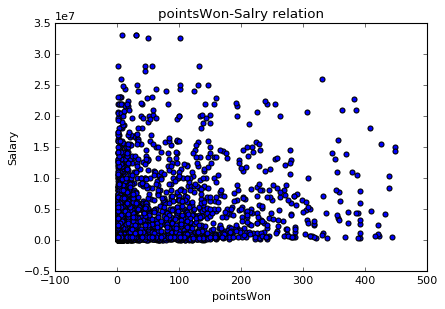

In [26]:
# Scatter plot for pointsWon and salary
plt.scatter(salaryPlayerDF["pointsWon"], salaryPlayerDF["salary"])
plt.xlabel('pointsWon')
plt.ylabel('Salary')
plt.title('pointsWon-Salry relation')
plt.show()

It seems we can't find the direct relationship. Let's calculate the correlation. 

In [27]:
# find the the correlation 
salaryPlayerDF["salary"].corr(salaryPlayerDF["pointsWon"])

0.1367225430021963

As expected the correlation comes out as a positive number, but it seems very weak.

## Conclusion

Now let's summarize what factors have an effect on player salaries.

1) The average player salary is changed with the year. Basically it increases with the time.

2) The average player salary is different for different teams. Some teams like NYA has higher salary. On the other hand, some teams like KCA has lower salary and doesn't change much these years.

3) The player salary is related to the points won by the player. The higher the pointswon is, the higher salary the player will get. 